## Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
import pydotplus
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import cv2
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import f1_score

## Data Reading and Preprocessing

In [2]:
data = pd.read_csv('../bank-additional/bank-additional.csv',sep=';')
data.head()

age          job  marital          education default  housing     loan  \
0   30  blue-collar  married           basic.9y      no      yes       no   
1   39     services   single        high.school      no       no       no   
2   25     services  married        high.school      no      yes       no   
3   38     services  married           basic.9y      no  unknown  unknown   
4   47       admin.  married  university.degree      no      yes       no   

     contact month day_of_week ...  campaign  pdays  previous     poutcome  \
0   cellular   may         fri ...         2    999         0  nonexistent   
1  telephone   may         fri ...         4    999         0  nonexistent   
2  telephone   jun         wed ...         1    999         0  nonexistent   
3  telephone   jun         fri ...         3    999         0  nonexistent   
4   cellular   nov         mon ...         1    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0         -1.8          92.893          -46.2      1.313       5099.1  no  
1          1.1          93.994          -36.4      4.855       5191.0  no  
2          1.4          94.465          -41.8      4.962       5228.1  no  
3          1.4          94.465          -41.8      4.959       5228.1  no  
4         -0.1          93.200          -42.0      4.191       5195.8  no  

[5 rows x 21 columns]

In [3]:
data = data.drop(['duration'], axis=1)

In [4]:
print(data.columns)

Index([u'age', u'job', u'marital', u'education', u'default', u'housing',
       u'loan', u'contact', u'month', u'day_of_week', u'campaign', u'pdays',
       u'previous', u'poutcome', u'emp.var.rate', u'cons.price.idx',
       u'cons.conf.idx', u'euribor3m', u'nr.employed', u'y'],
      dtype='object')


In [5]:
print(data.shape)

(4119, 20)


In [6]:
categorical_columns = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y']

In [7]:
response = data['y']

In [8]:
response = np.array(response)
np.unique(response,return_counts=True)

(array(['no', 'yes'], dtype=object), array([3668,  451]))

In [9]:
le = LabelEncoder()
for ix in categorical_columns:
    data[ix] = le.fit_transform(data[ix])

In [10]:
data = data.dropna()
data.head()
df = data

In [11]:
split = int(0.8*data.shape[0])

In [12]:
data = data.values

## Function to plot Confusion Matrix

In [13]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    import itertools
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

## Decision Tree

In [14]:
dt = DecisionTreeClassifier(max_depth=9)
pred = dt.fit(data[:split,:-1],data[:split,-1]).predict(data[split:,:-1])
print('Training Accuracy: ' + str(dt.score(data[:,:-1],data[:,-1])) )
print('Validation Accuracy: ' + str(dt.score(data[split:,:-1],data[split:,-1])) )

Training Accuracy: 0.9249817916970139
Validation Accuracy: 0.9065533980582524


In [15]:
dot_data = StringIO()
export_graphviz(dt,out_file=dot_data,filled=True,rounded=True)

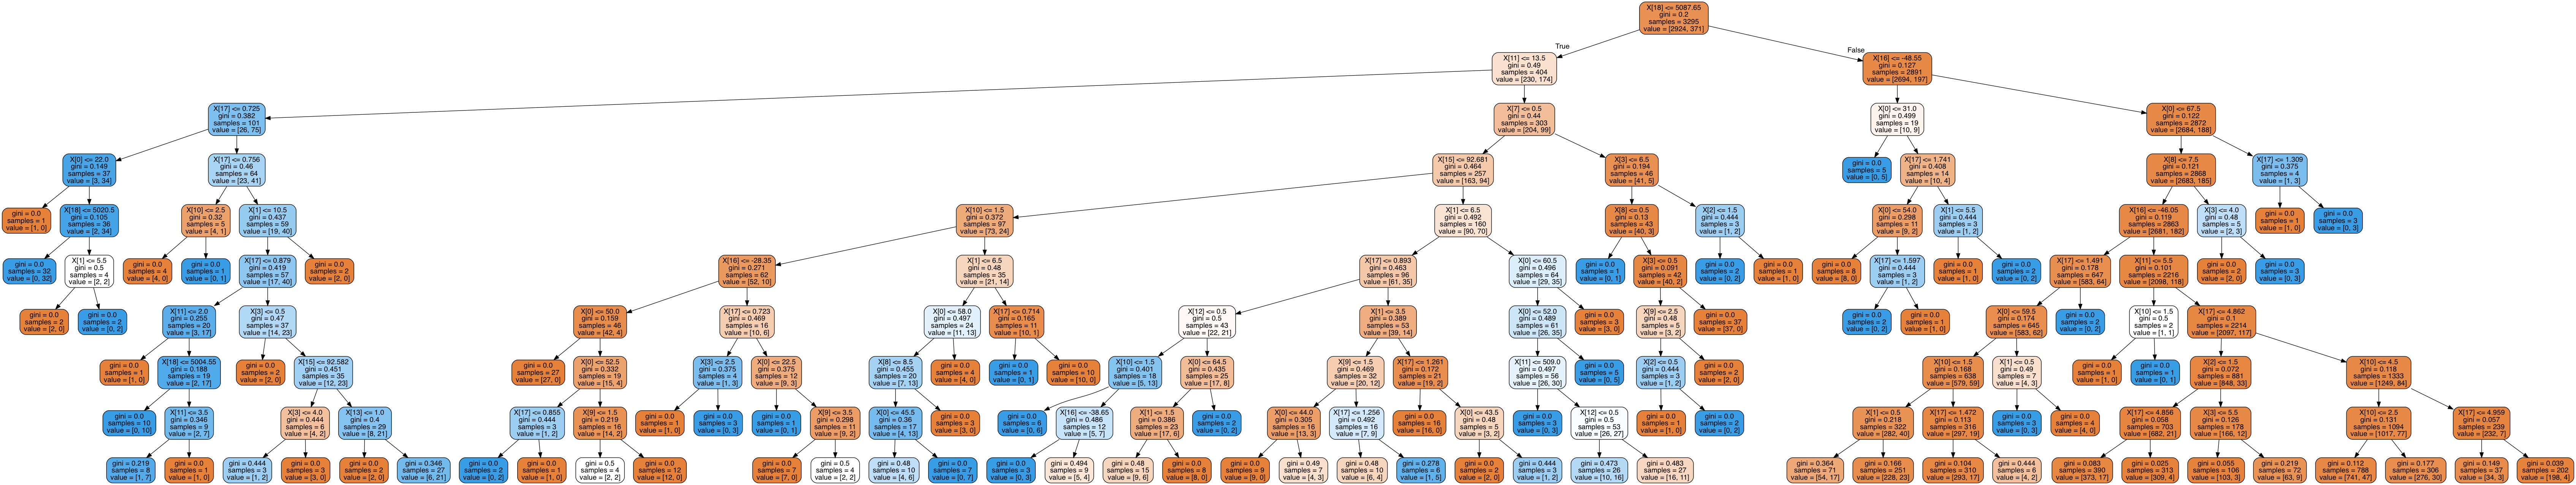

In [16]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [17]:
graph.write_png("../Assets/dtreeSmall.png")

True

In [18]:
cnf_matrix = confusion_matrix(data[split:,-1], pred)
np.set_printoptions(precision=2)

[[719  25]
 [ 52  28]]


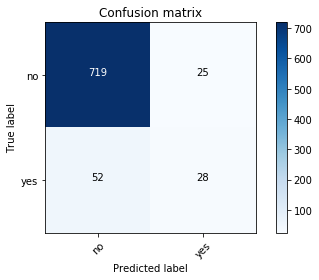

In [19]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['no','yes'],
                      title='Confusion matrix')
plt.show()

In [20]:
print(f1_score(data[split:,-1], pred))

0.42105263157894735


## Random Forest

In [21]:
rf = RandomForestClassifier(n_estimators=100,max_depth=10)
pred = rf.fit(data[:split,:-1],data[:split,-1]).predict(data[split:,:-1])
print('Training Accuracy: ' + str(rf.score(data[:,:-1],data[:,-1])) )
print('Validation Accuracy: ' + str(rf.score(data[split:,:-1],data[split:,-1])) )

Training Accuracy: 0.9334789997572226
Validation Accuracy: 0.9029126213592233


In [22]:
cnf_matrix = confusion_matrix(data[split:,-1], pred)
np.set_printoptions(precision=2)

[[726  18]
 [ 62  18]]


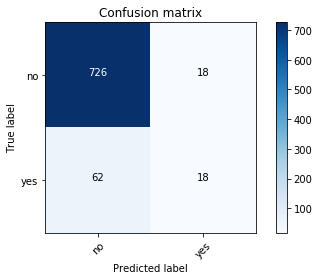

In [23]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['no','yes'],
                      title='Confusion matrix')
plt.show()

In [24]:
print(f1_score(data[split:,-1], pred))

0.3103448275862069


## Support Vector Machine

In [25]:
svm = SVC(gamma='auto')
pred = svm.fit(data[:split,:-1],data[:split,-1]).predict(data[split:,:-1])
print('Training Accuracy: ' + str(svm.score(data[:,:-1],data[:,-1])) )
print('Validation Accuracy: ' + str(svm.score(data[split:,:-1],data[split:,-1])) )

Training Accuracy: 0.930322893906288
Validation Accuracy: 0.8968446601941747


In [26]:
cnf_matrix = confusion_matrix(data[split:,-1], pred)
np.set_printoptions(precision=2)

[[737   7]
 [ 78   2]]


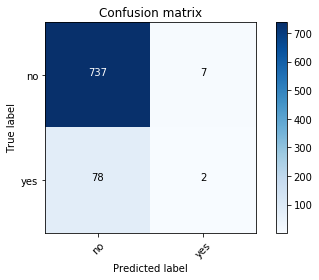

In [27]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['no','yes'],
                      title='Confusion matrix')
plt.show()

In [28]:
print(f1_score(data[split:,-1], pred))

0.04494382022471911


## Principal Component Analysis

In [29]:
data_x = data[:,:-1]
pca = PCA(n_components=5)
data_x = pca.fit_transform(data_x)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[8.89e-01 1.07e-01 2.51e-03 4.83e-04 3.07e-04]
[12466.21  4318.85   662.21   290.44   231.62]


## Table Showing relations of Principle Components with various attributes of Data Frame

In [30]:
print(pd.DataFrame(pca.components_,columns=df.columns[:-1],index = ['PC-1','PC-2','PC-3','PC-4','PC-5']))

           age       job   marital  education   default   housing      loan  \
PC-1  0.002393  0.000183  0.000138   0.000699 -0.000200  0.000117 -0.000027   
PC-2  0.003886  0.001748  0.000557   0.001221 -0.000820  0.000337 -0.000161   
PC-3  0.997803  0.005427 -0.023414  -0.027438  0.006526 -0.000930 -0.000555   
PC-4 -0.051692  0.105245  0.005042   0.085825 -0.001967 -0.005985  0.000364   
PC-5  0.003614  0.986998  0.002878   0.106570 -0.005171  0.002458 -0.000382   

       contact     month  day_of_week  campaign     pdays  previous  poutcome  \
PC-1 -0.000330  0.000823    -0.000108 -0.000890 -0.986298  0.001688  0.000843   
PC-2 -0.001608  0.008514    -0.000689 -0.005593  0.164910  0.002251 -0.001997   
PC-3  0.001403 -0.006956    -0.003662 -0.002034  0.001911  0.000800  0.000155   
PC-4  0.024035 -0.002533     0.012141 -0.005607  0.003688 -0.007084  0.007230   
PC-5 -0.006626 -0.033117    -0.005445  0.016519 -0.000456  0.002632 -0.002499   

      emp.var.rate  cons.price.idx  co

In [31]:
print(data_x.shape)

(4119, 5)


## Applying same algorithms on data obtained after PCA

## Decision Tree

In [32]:
dt = DecisionTreeClassifier(max_depth=15)
pred = dt.fit(data_x[:split],data[:split,-1]).predict(data_x[split:])
print('Training Accuracy: ' + str(dt.score(data_x[:],data[:,-1])) )
print('Validation Accuracy: ' + str(dt.score(data_x[split:],data[split:,-1])) )

Training Accuracy: 0.952172857489682
Validation Accuracy: 0.8628640776699029


In [33]:
cnf_matrix = confusion_matrix(data[split:,-1], pred)
np.set_printoptions(precision=2)

[[688  56]
 [ 57  23]]


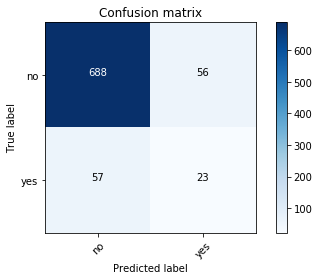

In [34]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['no','yes'],
                      title='Confusion matrix')
plt.show()

In [35]:
print(f1_score(data[split:,-1], pred))

0.2893081761006289


In [36]:
dot_data = StringIO()
export_graphviz(dt,out_file=dot_data,filled=True,rounded=True)

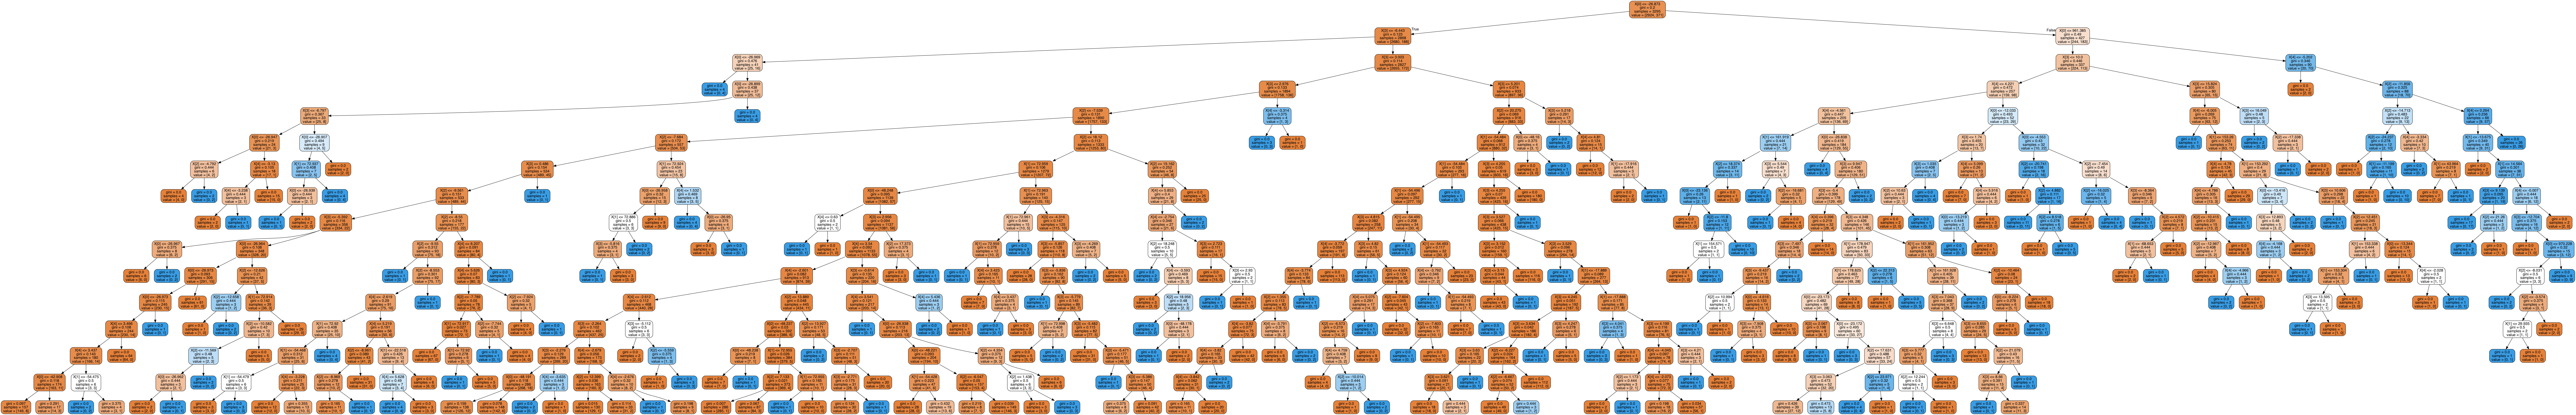

In [37]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [38]:
graph.write_png("../Assets/dtreePCASmall.png")

True

## Random Forest

In [39]:
rf = RandomForestClassifier(n_estimators=100,max_depth=10)
pred = rf.fit(data_x[:split],data[:split,-1]).predict(data_x[split:])
print('Training Accuracy: ' + str(rf.score(data_x[:],data[:,-1])) )
print('Validation Accuracy: ' + str(rf.score(data_x[split:],data[split:,-1])) )

Training Accuracy: 0.9320223355183297
Validation Accuracy: 0.9029126213592233


In [40]:
cnf_matrix = confusion_matrix(data[split:,-1], pred)
np.set_printoptions(precision=2)

[[728  16]
 [ 64  16]]


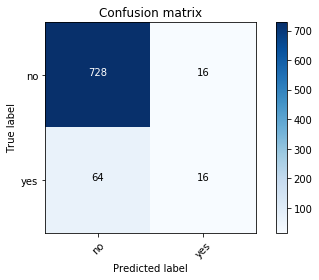

In [41]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['no','yes'],
                      title='Confusion matrix')
plt.show()

In [42]:
print(f1_score(data[split:,-1], pred))

0.28571428571428575


## Support Vector Macines

In [43]:
svm = SVC(gamma='auto')
pred = svm.fit(data_x[:split],data[:split,-1]).predict(data_x[split:])
print('Training Accuracy: ' + str(svm.score(data_x[:],data[:,-1])) )
print('Validation Accuracy: ' + str(svm.score(data_x[split:],data[split:,-1])) )

Training Accuracy: 0.9283806749210973
Validation Accuracy: 0.9004854368932039


In [44]:
cnf_matrix = confusion_matrix(data[split:,-1], pred)
np.set_printoptions(precision=2)

[[736   8]
 [ 74   6]]


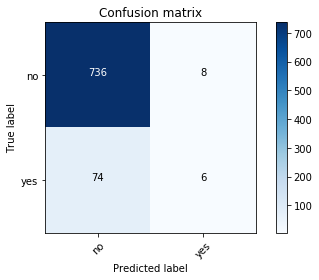

In [45]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['no','yes'],
                      title='Confusion matrix')
plt.show()

In [46]:
print(f1_score(data[split:,-1], pred))

0.1276595744680851
